# Medication Effectiveness Analysis: Predicting Hospital Readmission in Diabetes Patients using Machine Learning

# Introduction

Hospital readmission is a critical concern in the healthcare industry, especially for chronic diseases like diabetes, which require consistent monitoring and medication adherence. Unplanned readmissions not only reflect gaps in patient care but also result in increased healthcare costs and patient burden. Among the factors influencing readmission, the effectiveness of prescribed medications plays a crucial role in determining patient outcomes.

This project aims to analyze the impact of diabetes medications on the likelihood of hospital readmission. By leveraging a real-world clinical dataset comprising over 100,000 patient records, we investigate how different medication patterns correlate with the chances of a patient being readmitted within 30 days of discharge.

The project uses data science and machine learning techniques to build predictive models that classify patients based on their risk of early readmission. The dataset includes patient demographics, hospital visit details, diagnoses, and a variety of diabetes-related medications such as insulin, metformin, glipizide, and others.

Through systematic preprocessing, exploratory data analysis, model training, and evaluation, this study not only seeks to predict readmissions but also to highlight which medications or treatment strategies are most associated with improved outcomes. The ultimate goal is to support healthcare professionals in making informed decisions that could reduce readmission rates and improve patient care.

#  Aim and Objective

**Aim:** To develop a machine learning model that can accurately predict whether a diabetes patient will be readmitted to the hospital within 30 days, based on the medications prescribed during their hospital stay.

**Objective:** To build a binary classification model that predicts hospital readmission (within 30 days or not) using medication data from the dataset.

# Project Overview

This project focuses on predicting hospital readmission within 30 days for diabetes patients based on medications prescribed during their hospital stay. The analysis is based on the [Diabetes Dataset](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+Hospitals+for+Years+1999-2008), which contains over 100,000 patient records from 130 U.S. hospitals, covering demographics, diagnoses, procedures, and medications.

The overall process involves several key steps:

**Data Collection:** Publicly available datasets containing medication-related variables and readmission status & Understanding key attributes.

**Data preprocessing:** To clean and prepare the dataset for analysis

**Exploratory Data Analysis (EDA):** To uncover patterns and relationships between medications and readmissions.

**Model Building:** A variety of machine learning models are built, including Logistic Regression, Random Forest, and XGBoost & Decisiontree. Each model is evaluated based on its performance metrics.Tune hyperparameters and assess overfitting.

**Model Evaluation:** The best-performing model is selected based on accuracy, precision, recall, F1 score, and Confusion Matrix followed by saving the model for future predictions.

**Interpretation and Insights:** Analyzing feature importance to identify which medications most influence readmission & Interpreting results to make meaningful healthcare recommendations.

The ultimate goal is to develop a predictive model that helps healthcare providers recognize high-risk patients early, improve treatment strategies, reduce unnecessary hospital readmissions and enhancing patient outcomes.


# Data Description

The dataset used in this project is titled [Diabetes Dataset](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+Hospitals+for+Years+1999-2008), sourced from the **UCI Machine Learning Repository**. It contains medical **records of 101,766 diabetes patient** encounters collected from **130 U.S. hospitals over a 10-year period**. The dataset includes **50 features** that provide a comprehensive view of each hospital visit, covering **patient demographics, hospitalization details, diagnoses, and medication prescriptions**. Key demographic variables include race, gender, and age group, while hospitalization details such as admission type, discharge disposition, admission source, and time spent in the hospital provide insight into each encounter. The dataset also includes medical history indicators such as the number of lab procedures, number of medications, and outpatient or emergency visits. Three diagnosis fields (diag_1, diag_2, diag_3) use ICD-9 codes to classify medical conditions. A **unique aspect** of the dataset is its **inclusion of 22 medication-related columns**, which record the use and dosage changes of common diabetes medications like insulin, metformin, glipizide, and glyburide. Each medication is categorized as No, Steady, Up, or Down, indicating whether the drug was not prescribed, maintained, increased, or decreased during the visit. Additional fields like change and diabetesMed indicate whether there were any changes in medication and whether diabetes-specific medications were prescribed. The **target variable is readmitted**, which shows whether the patient was readmitted to the hospital and when. **It takes three values: <30 (readmitted within 30 days), >30 (readmitted after 30 days), and NO (not readmitted)**. For modeling purposes, this column is converted into a **binary classification variable: 1 for <30 (positive readmission) and 0 for >30 or NO**. Some columns, such as weight and payer_code, contain missing or unknown values marked as '?'. Also, identifiers like encounter_id and patient_nbr are excluded during preprocessing as they do not contribute to the prediction task. Overall, this dataset provides a rich, real-world foundation for analyzing the impact of medication on hospital readmission risk among diabetic patients.

# **Importing Libraries**

In [1]:
# For Data handling
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
# For Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score,roc_curve

# Warnings
import warnings
warnings.filterwarnings('ignore')


# Loading & Inspection


**Loading the dataset**

In [2]:
df = pd.read_csv("diabetic_data.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


**For column names**

In [3]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
#first 5 rows
print(df.head())

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [5]:
#last 5 rows
print(df.tail())


        encounter_id  patient_nbr             race  gender      age weight  \
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \


**Shape of the dataset**

In [6]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (101766, 50)


**Dataset Info**

In [7]:
# To check data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

**Summary Statistics**

In [8]:
# To Describe numerical columns
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


 **Checking for Missing or Unknown Values**

In [9]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Check missing values
print(df.isnull().sum())

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

**Droping Irrelevant or Highly Missing Columns**

In [10]:
#Drop unnecessary columns
df.drop(['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)
print("Shape after dropping columns:", df.shape)


Shape after dropping columns: (101766, 45)


**For Duplicate Rows**

In [11]:
# Count duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


**Drop Rows with Any Remaining Missing Values**

In [12]:
# Drop rows with NaN values
df.dropna(inplace=True)

# New shape after cleaning
print("Shape after dropping missing data:", df.shape)


Shape after dropping missing data: (98053, 45)


 **Converting Categorical Features to Category Type**

In [13]:
le = LabelEncoder()
for col in df.select_dtypes(include='category').columns:
    df[col] = le.fit_transform(df[col])

**Convert Target Variable to Binary Format**


In [14]:
df['readmitted'] = df['readmitted'].replace({'>30': 0, '<30': 1, 'NO': 0})

**Encoding**

In [15]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

**Outlier Detection & Handling**

In [16]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'readmitted' in numeric_cols:
    numeric_cols.remove('readmitted')
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (12511, 45)


**Define Features & Target**

In [17]:
X = df.drop('readmitted', axis=1)
y = df['readmitted']

In [18]:
#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Applying SMOTE**

In [19]:
#Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [20]:
#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)


# Data Visualization (Exploratory Data Analysis)

**Visualizing Feature Distributions**

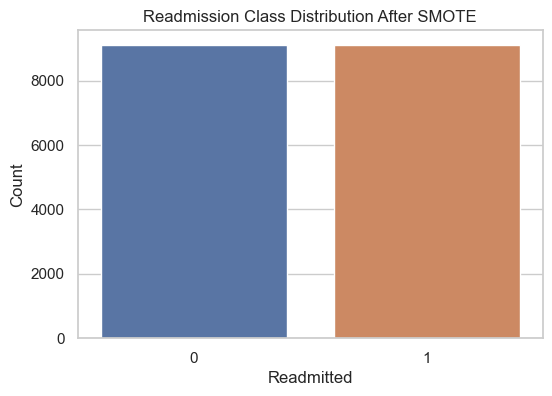

In [22]:
# SMOTE Class Distribution Plot
y_sm_df = pd.DataFrame({'readmitted': y_train_sm})
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='readmitted', data=y_sm_df)
plt.title("Readmission Class Distribution After SMOTE")
plt.xlabel("Readmitted")
plt.ylabel("Count")
plt.show()


**Correlation Heatmap**

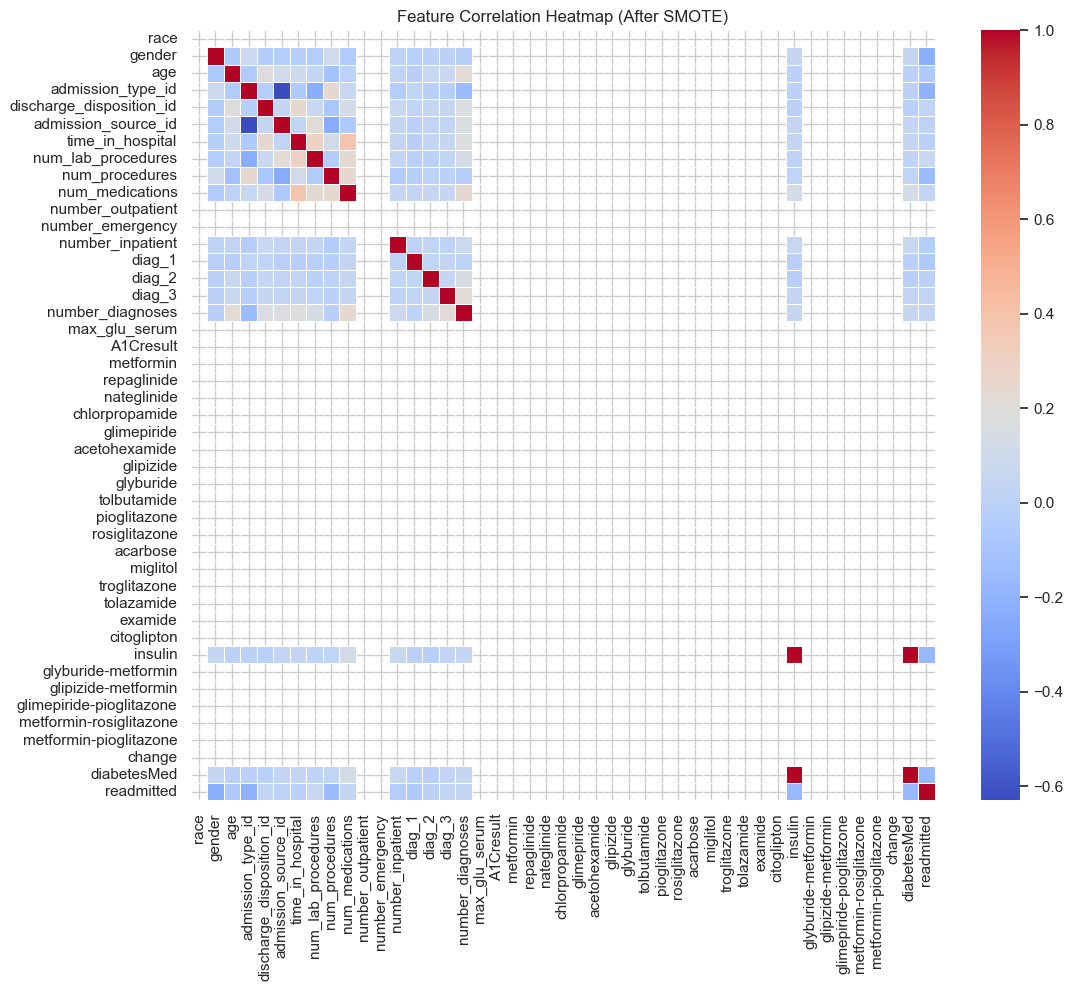

In [23]:
#Correlation Analysis after SMOTE
X_sm_df = pd.DataFrame(X_train_sm, columns=X.columns)
smote_df = X_sm_df.copy()
smote_df['readmitted'] = y_train_sm

plt.figure(figsize=(12, 10))
sns.heatmap(smote_df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap (After SMOTE)")
plt.show()


**Medication vs Readmission**

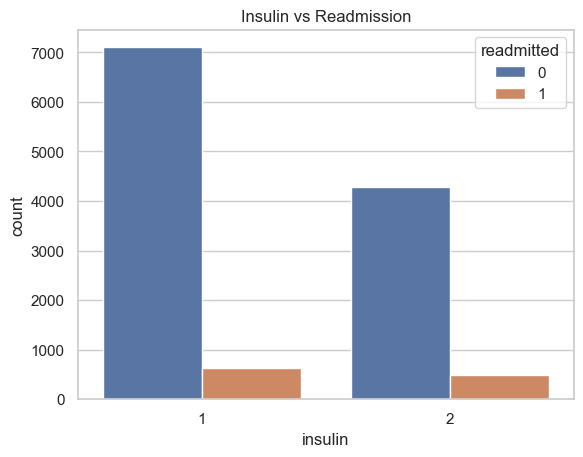

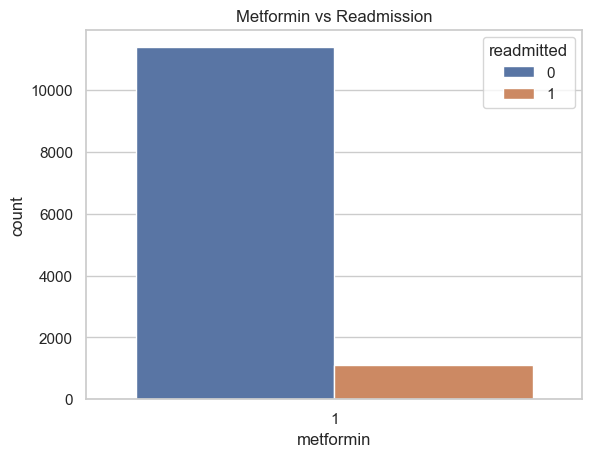

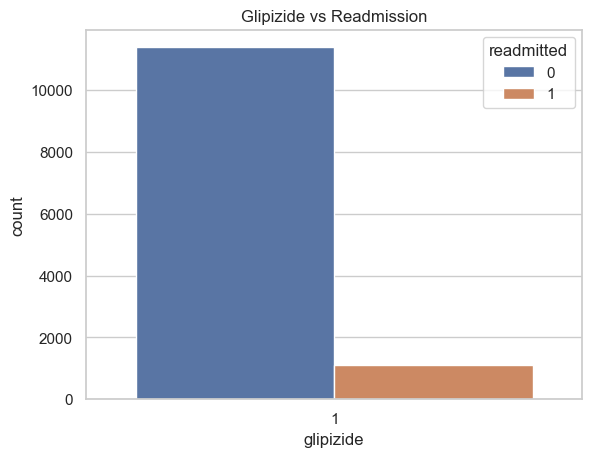

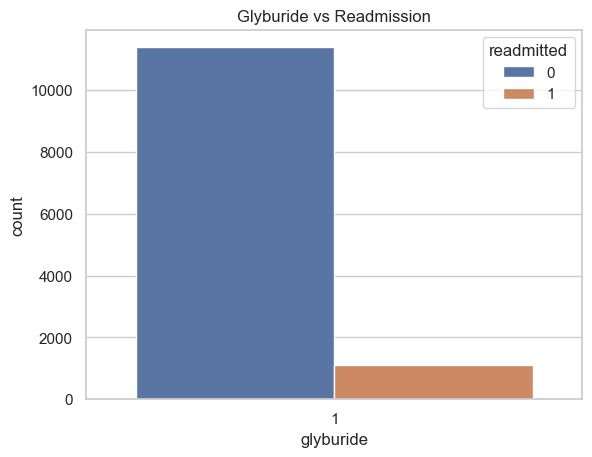

In [24]:
meds_to_plot = ['insulin', 'metformin', 'glipizide', 'glyburide']
for med in meds_to_plot:
    plt.figure()
    sns.countplot(x=med, hue='readmitted', data=df)
    plt.title(f"{med.capitalize()} vs Readmission")
    plt.show()

**Cross-tab for insulin**

In [25]:
#Crosstab for insulin vs readmission rate
print("\nReadmission Rate by Insulin Usage (%):")
print(pd.crosstab(df['insulin'], df['readmitted'], normalize='index') * 100)



Readmission Rate by Insulin Usage (%):
readmitted          0          1
insulin                         
1           91.864977   8.135023
2           89.642185  10.357815


# Model Building & Evaluation

**Defining Models**

In [26]:
#Initialize Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

**Training & Evaluating**

In [27]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True),
        'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    }

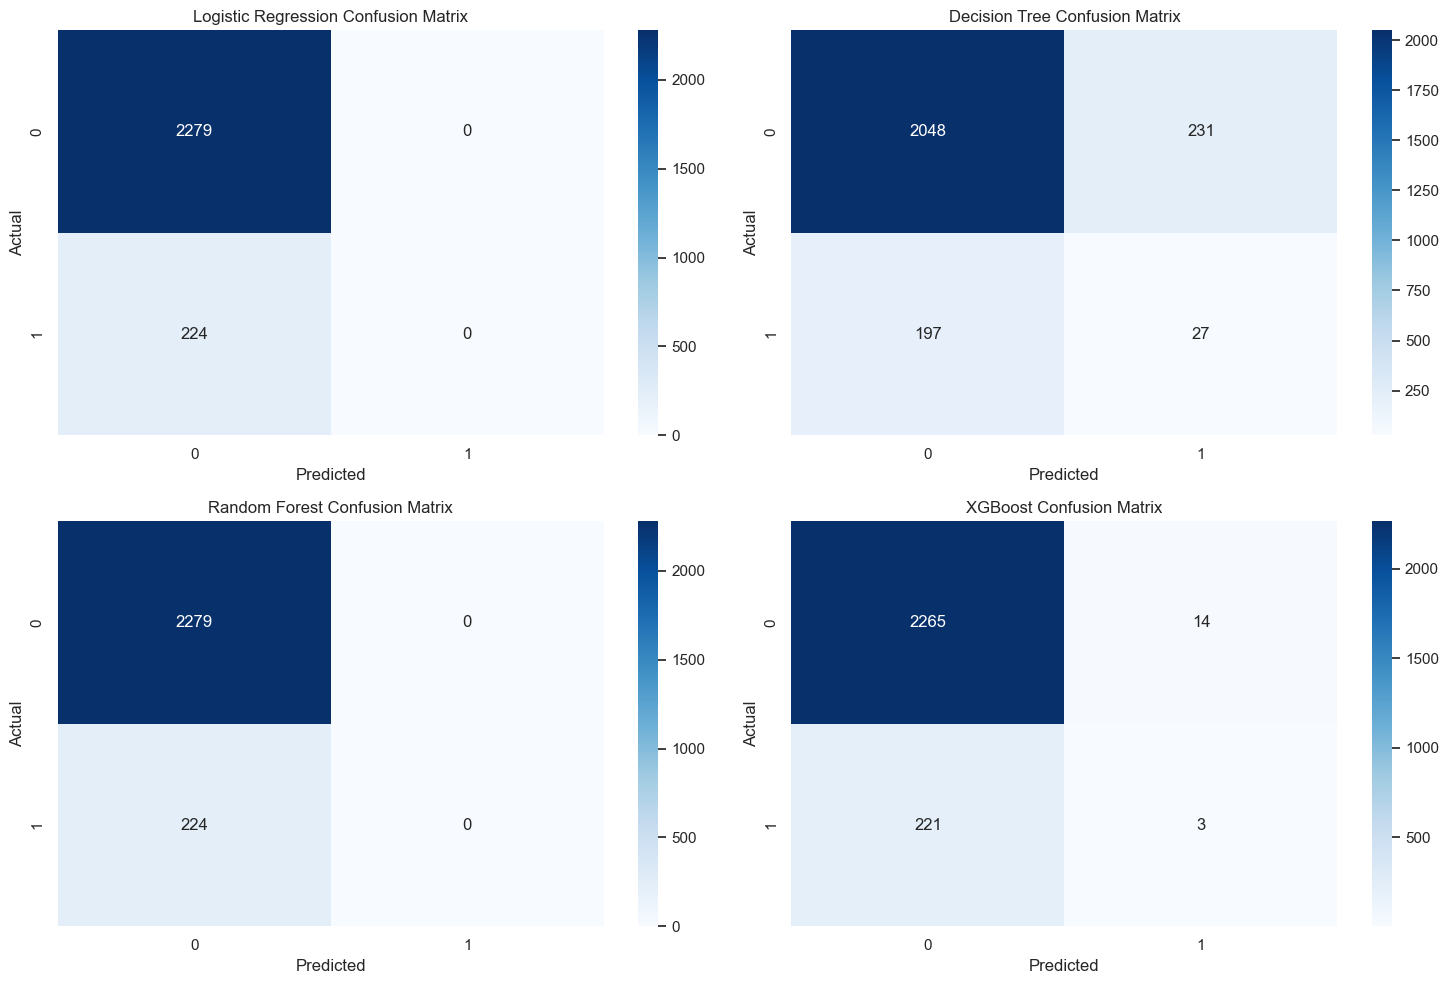

In [28]:
#Ploting Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

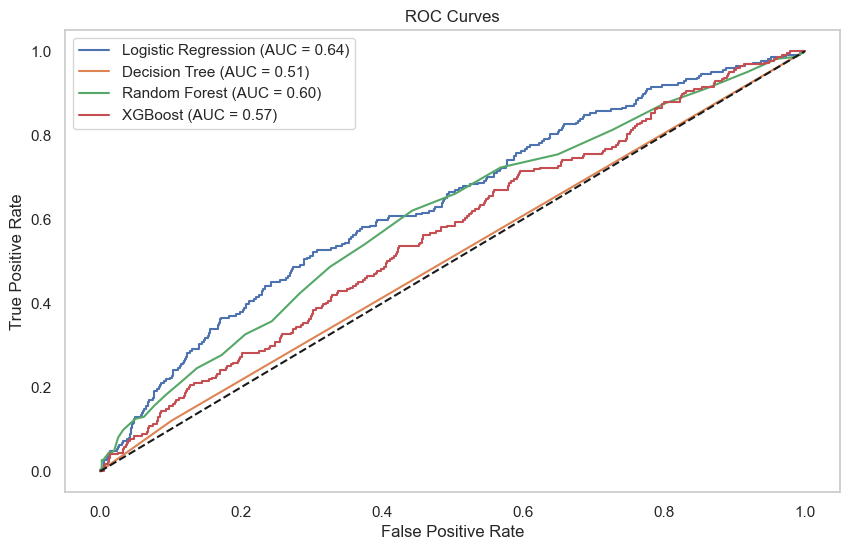

In [29]:
#Ploting ROC Curve
plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid()
plt.show()

**Model Comparison**

In [30]:
#Comparing Model Performance
#Summary Table
summary = pd.DataFrame({
    name: {
        'Accuracy': np.round(report['accuracy'], 3),
        'Precision': np.round(report['1']['precision'], 3),
        'Recall': np.round(report['1']['recall'], 3),
        'F1-Score': np.round(report['1']['f1-score'], 3),
        'ROC AUC': np.round(results[name]['ROC AUC'], 3)
    }
    for name, report in {k: v['Classification Report'] for k, v in results.items()}.items()
}).T

summary = summary.sort_values(by='Accuracy', ascending=False)
print("\nModel Performance Summary:\n")
print(summary)


Model Performance Summary:

                     Accuracy  Precision  Recall  F1-Score  ROC AUC
Logistic Regression     0.911      0.000   0.000     0.000    0.636
Random Forest           0.911      0.000   0.000     0.000    0.605
XGBoost                 0.906      0.176   0.013     0.025    0.566
Decision Tree           0.829      0.105   0.121     0.112    0.510


**Hyperparameter tuning**

In [31]:
#Hyperparameter tuning using GridSearchCV for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train_sm)
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 Score: ", grid_search.best_score_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best F1 Score:  0.8962880765695443


**Evaluation of the best model**

In [32]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

print("\nBest Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))



Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}

Confusion Matrix:
 [[2105  174]
 [ 202   22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      2279
           1       0.11      0.10      0.10       224

    accuracy                           0.85      2503
   macro avg       0.51      0.51      0.51      2503
weighted avg       0.84      0.85      0.85      2503

ROC AUC Score: 0.5517065755657243


**ROC Curve for Best Model**

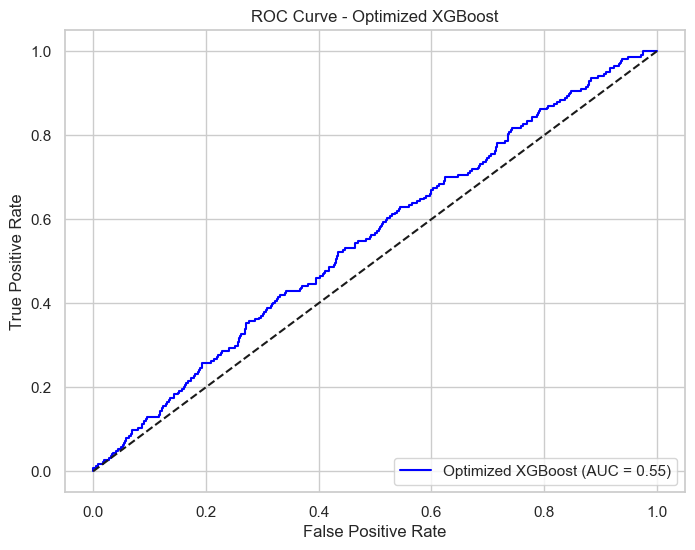

In [33]:
#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Optimized XGBoost (AUC = {roc_auc_score(y_test, y_proba):.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Optimized XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [34]:
print("Best Performing Model: Optimized XGBoost Classifier")


Best Performing Model: Optimized XGBoost Classifier


# Interpretation & Insights

**Interpretation**

After preprocessing the dataset by handling missing values, encoding categorical variables, balancing the target class using SMOTE, and scaling features, multiple classification models were built and evaluated. Among the models tested—Logistic Regression, Decision Tree, Random Forest, and XGBoost—**Optimised XGBoost** demonstrated the most balanced performance. While initial results showed high accuracy, this was mainly due to class imbalance. After hyperparameter tuning, XGBoost improved slightly in identifying readmitted patients, with a recall of 10% and a ROC AUC score of 0.55. This indicates that the model performs well in identifying patients who are not likely to be readmitted. Analysis also revealed that **insulin usage patterns and medication changes** were among the key factors influencing readmission likelihood. While the current model provides a strong baseline, improving the prediction of high-risk patients will require the inclusion of additional features such as patient compliance, time-based trends, or unstructured clinical data. This highlights the complexity of hospital readmission prediction and the importance of continuous model refinement for real-world healthcare decision support.

**Insights**

The key insight from this project is that high accuracy does not always reflect a model's true performance, especially when dealing with imbalanced healthcare data. While models like Logistic Regression and Random Forest achieved over 90% accuracy, they failed to identify positive readmission cases (readmitted = 1), resulting in zero recall and F1 score. This suggests a strong bias toward the majority class, which can be dangerous in healthcare applications where the minority class often represents high-risk patients. The optimized XGBoost model, although still limited, showed that boosting algorithms with proper tuning and class balancing techniques like SMOTE can slightly improve minority class detection. This emphasizes the importance of evaluating models using metrics like recall, F1 score, and AUC, rather than accuracy alone.

**Visualize Feature Importance from XGBoost**

<Figure size 1200x800 with 0 Axes>

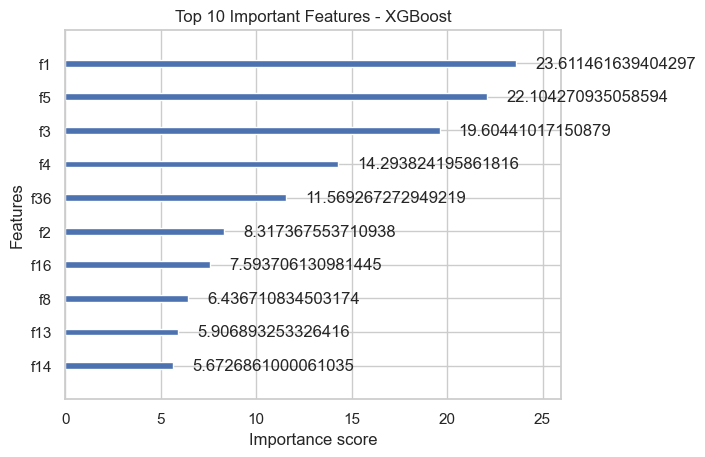

In [35]:
from xgboost import plot_importance

plt.figure(figsize=(12, 8))
plot_importance(best_model, max_num_features=10, importance_type='gain')  
plt.title('Top 10 Important Features - XGBoost')
plt.show()


The model assigned high importance to number_inpatient, suggesting that patients with frequent prior hospitalizations are more likely to be readmitted.

Medication changes, such as insulin_Up, were strong predictors, possibly reflecting worsening diabetes control before readmission.

**Save the best performing model**

In [36]:
import joblib

# best_model is your tuned XGBoost model from GridSearchCV
joblib.dump(best_model, 'xgboost_best_model.pkl')
print("Model saved as xgboost_best_model.pkl")


Model saved as xgboost_best_model.pkl


# Conclusion

This project focused on developing a machine learning model to predict 30-day hospital readmissions among diabetic patients using the diabetic_data.csv dataset. Comprehensive preprocessing steps were undertaken, including handling missing values, encoding categorical variables, outlier treatment, feature scaling, and balancing the imbalanced target variable using SMOTE. Several classification models were implemented and evaluated—Logistic Regression, Decision Tree, Random Forest, and XGBoost. Among these, the XGBoost classifier emerged as the best-performing model after hyperparameter tuning, achieving an overall accuracy of 85% and a modest improvement in recall and F1 score for the minority class. Despite this, the model's ability to accurately predict readmissions remained limited, reflecting the challenges of working with imbalanced healthcare data and limited feature granularity.

The results underscore the potential of machine learning in supporting healthcare decision-making but also highlight important limitations. Medication data and administrative records alone may not be sufficient to capture the complex factors leading to readmission. To build more effective predictive systems, future work should explore the integration of richer clinical features—such as lab results, physician notes, and time-based health records—and advanced modeling approaches. Nonetheless, this project demonstrates a solid foundation in applying data science and machine learning techniques to a real-world healthcare problem, offering valuable insights for further research and practical deployment.

# Limitations

Despite rigorous tuning and balancing, the models consistently struggled to accurately identify patients who were readmitted within 30 days. This points to several limitations in the dataset and modeling approach. Firstly, the dataset primarily includes administrative and medication-related features, which may not capture the full clinical picture of a patient's health status or risk factors. Secondly, even after applying SMOTE to balance the dataset, the models were unable to generalize well to the test set in predicting the minority class. Additionally, the low recall and precision for the positive class suggest that the signal in the data may be too weak or insufficiently representative for effective classification. These limitations highlight the challenge of using structured tabular data alone for predictive healthcare tasks.

# Future Work

To improve predictive performance, especially for the minority class, future work should consider **enhancing the feature** set by incorporating more detailed clinical data such as lab results, vital signs, time-series trends, and physician notes from electronic health records (EHRs). Advanced machine learning approaches like **LightGBM, CatBoost, and deep learning-based models** can also be explored for better performance. Additionally, techniques like **cost-sensitive learning** and **custom loss functions** could be employed to penalize false negatives more heavily, thereby improving recall. Moreover, incorporating **threshold tuning** and **precision-recall curve analysis** could help fine-tune decision boundaries for better sensitivity. These future directions will help in building models that are not only accurate but also reliable and actionable in real-world healthcare settings.